In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/cleaned_yield_dataset.csv')

In [3]:
df.head()

,State,Year,Season,Crop,Area,Rainfall,Production
0,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,2763.2,321.0
1,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.0,2763.2,641.0
2,Andaman and Nicobar Islands,2000,Whole Year,Dry ginger,36.0,2763.2,100.0
3,Andaman and Nicobar Islands,2000,Whole Year,Sugarcane,1.0,2763.2,2.0
4,Andaman and Nicobar Islands,2000,Whole Year,Sweet potato,5.0,2763.2,15.0


In [4]:
df.shape

(64360, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64360 entries, 0 to 64359
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       64360 non-null  object 
 1   Year        64360 non-null  int64  
 2   Season      64360 non-null  object 
 3   Crop        64360 non-null  object 
 4   Area        64360 non-null  float64
 5   Rainfall    64360 non-null  float64
 6   Production  64360 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.4+ MB


In [6]:
df.corr()

,Year,Area,Rainfall,Production
Year,1.000000,0.000101,-0.017956,-0.018868
Area,0.000101,1.000000,-0.110295,0.241445
Rainfall,-0.017956,-0.110295,1.000000,-0.065504
Production,-0.018868,0.241445,-0.065504,1.000000


## Data Visualization

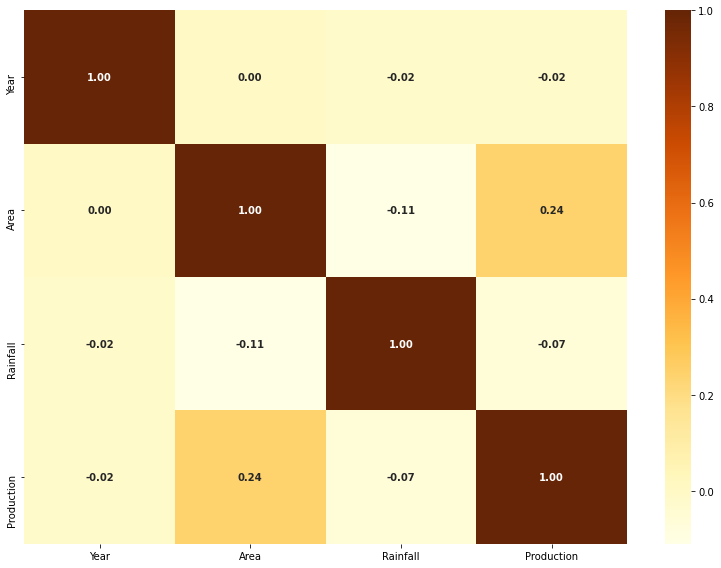

In [7]:
plt.figure(figsize=(11,8))
g=sns.heatmap(df.corr(),cmap='YlOrBr',annot=True,fmt='.2f',annot_kws={'fontsize':10, 'fontweight': 'bold'})
plt.tight_layout();

In [8]:
df_sample = df.sample(n=500, random_state=42)
sns.set_style('darkgrid')

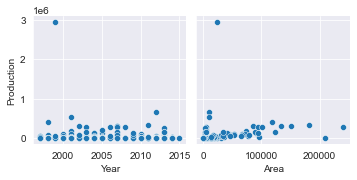

In [9]:
g = sns.pairplot(df_sample, x_vars=['Year', 'Area'], y_vars=['Production'])

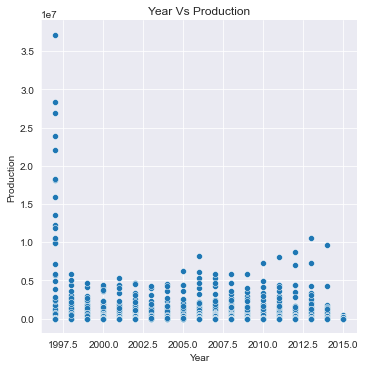

In [10]:
YP = sns.relplot(data=df, x="Year", y="Production").set(title="Year Vs Production")

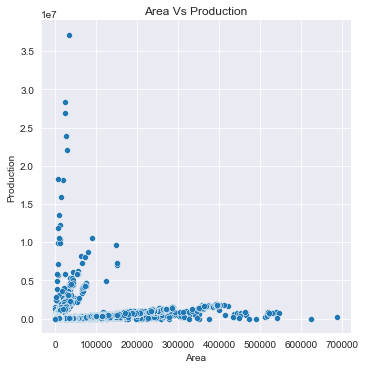

In [11]:
AP = sns.relplot(data=df, x="Area", y="Production").set(title="Area Vs Production")

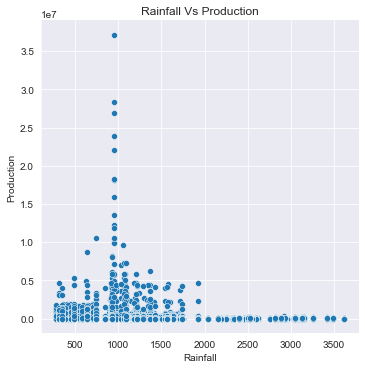

In [12]:
RP = sns.relplot(data=df, x="Rainfall", y="Production").set(title="Rainfall Vs Production")

In [13]:
df_rice = df[(df["Crop"]=="Rice")]
df_rice.head() #since rice data is more than any other crop

,State,Year,Season,Crop,Area,Rainfall,Production
0,Andaman and Nicobar Islands,2000,Kharif,Rice,102.00,2763.2,321.00
5,Andaman and Nicobar Islands,2001,Kharif,Rice,83.00,3080.9,300.00
9,Andaman and Nicobar Islands,2002,Kharif,Rice,189.20,2620.2,510.84
14,Andaman and Nicobar Islands,2003,Kharif,Rice,52.00,2355.9,90.17
18,Andaman and Nicobar Islands,2004,Kharif,Rice,52.94,2460.1,72.57


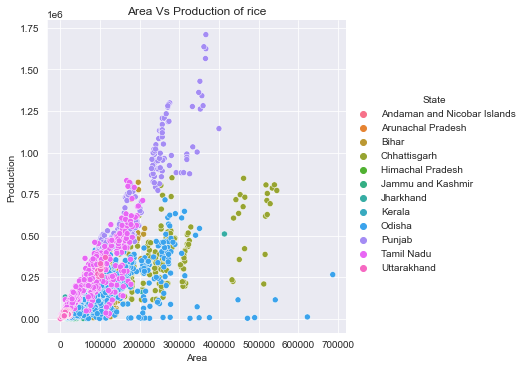

In [14]:
rice_ap = sns.relplot(data=df_rice, x="Area", y="Production", hue="State").set(title="Area Vs Production of rice")

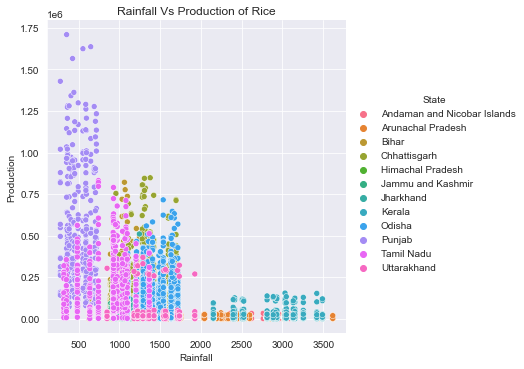

In [15]:
rice_rp= sns.relplot(data=df_rice, x="Rainfall", y="Production",hue="State").set(title="Rainfall Vs Production of Rice")

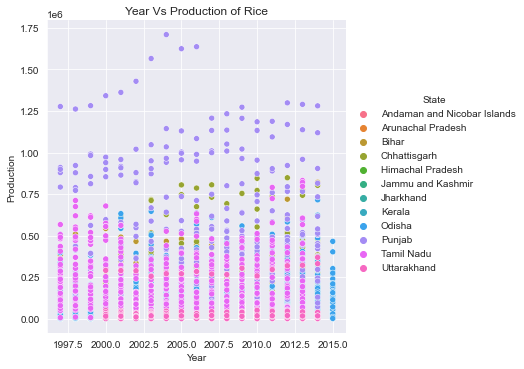

In [16]:
rice_yp = sns.relplot(data=df_rice, x="Year", y="Production",hue="State").set(title="Year Vs Production of Rice")

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
categorical_data = ['State', 'Season', 'Crop']

for label in categorical_data:
    print(label ,': ', len(df[label].unique()))

State :  12
Season :  3
Crop :  33


In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe =  OneHotEncoder(sparse=False, handle_unknown='ignore')
stdsc = StandardScaler()
# performs ohe on state, crop and season and standard scaler on year, area and rainfall
ct = ColumnTransformer([('encoder', ohe, [0,2,3]),('scaler',stdsc,[1,4,5])], remainder = 'passthrough')

In [20]:
# X = ct.fit_transform(X)

### Splitting the data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Pipeline


In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0, n_estimators=50)
pipe = make_pipeline(ct, regr)

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 2, 3]),
                                                 ('scaler', StandardScaler(),
                                                  [1, 4, 5])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50, random_state=0))])

In [24]:
pipe.score(X_test, y_test)

0.9808626940580472

In [25]:
pipe.predict([['Chhatisgarh',2011,'Kharif','Rice', 177115, 1302.7]])[0]

379223.12

In [26]:
pipe.predict([['Andaman and Nicobar Islands', 2006, 'Whole Year', 'Banana', 198, 2404.7]])[0]

1098.5424

### Using K-Fold cross validation

In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(pipe, X, y, cv=cv)

array([0.94672771, 0.95450651, 0.94540092, 0.91165769, 0.97142466])

### Saving the model

In [28]:
import joblib

# compressing the file to save disk space
with open('../Models/crop_yield_prediction.joblib','wb') as f:
    joblib.dump(pipe,f,compress='lz4')